In [60]:
import pandas as pd
import yfinance as yf
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import statsmodels.api as sm
from scipy.signal import butter,filtfilt
from matplotlib import colors as mcolors
from sklearn.linear_model import LinearRegression
from random import sample
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
from tslearn.shapelets import LearningShapelets
from collections import Counter

In [61]:
pd.read_csv('../data/dj30/DJI_labeled_3_24.csv').head()

,Unnamed: 0,date,tic,open,high,low,close,adjcp,Volume,pct_return,adjcp_filtered,pct_return_filtered,label,stock_type
0,0,2000-01-03,DJI,11501.849609,11522.009766,11305.690430,11357.509766,11357.509766,169750000,0.000000,11357.564298,-0.000046,0,0
1,1,2000-01-04,DJI,11349.750000,11350.059570,10986.450195,10997.929688,10997.929688,178420000,-0.031660,11242.991709,0.002442,0,0
2,2,2000-01-05,DJI,10989.370117,11215.099609,10938.669922,11122.650391,11122.650391,203190000,0.011340,11198.391178,0.004607,0,0
3,3,2000-01-06,DJI,11113.370117,11313.450195,11098.450195,11253.259766,11253.259766,176550000,0.011743,11248.024222,0.006150,0,0
4,4,2000-01-07,DJI,11247.059570,11528.139648,11239.919922,11522.559570,11522.559570,184900000,0.023931,11361.702549,0.006853,0,0


In [68]:
DJI=pd.read_csv('../data/dj30/DJI_labeled_3_24.csv').loc[:,['date','label']]
test=pd.read_csv('../data/dj30/test.csv',index_col=0)

In [69]:
test.head()

,date,open,high,low,close,adjcp,tic,zopen,zhigh,zlow,zadjcp,zclose,zd_5,zd_10,zd_15,zd_20,zd_25,zd_30
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.453430,AAPL,0.031760,0.032455,-0.020478,-0.007392,-0.024719,0.031420,0.017758,0.002323,-0.010486,-0.021578,-0.034987
0,2021-01-04,231.250000,231.250000,223.669998,226.660004,217.989258,AMGN,0.020251,0.020251,-0.013192,-0.038254,-0.014179,0.000856,-0.004266,0.001206,0.002958,0.000972,-0.002494
0,2021-01-04,121.300003,121.800003,116.849998,118.040001,116.058220,AXP,0.027618,0.031854,-0.010081,-0.016789,-0.023737,0.007930,-0.002330,0.000971,0.011670,0.014202,0.010022
0,2021-01-04,210.000000,210.199997,202.490005,202.720001,202.720001,BA,0.035912,0.036898,-0.001135,0.000000,-0.052976,0.051490,0.065741,0.083935,0.102499,0.099298,0.089213
0,2021-01-04,183.000000,185.979996,180.250000,182.149994,176.713684,CAT,0.004667,0.021027,-0.010431,-0.029845,0.000714,-0.012649,-0.014598,-0.014490,-0.014181,-0.020199,-0.024026


In [70]:
merged=test.merge(DJI,on='date')

In [71]:
merged.head()

,date,open,high,low,close,adjcp,tic,zopen,zhigh,zlow,zadjcp,zclose,zd_5,zd_10,zd_15,zd_20,zd_25,zd_30,label
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.453430,AAPL,0.031760,0.032455,-0.020478,-0.007392,-0.024719,0.031420,0.017758,0.002323,-0.010486,-0.021578,-0.034987,1
1,2021-01-04,231.250000,231.250000,223.669998,226.660004,217.989258,AMGN,0.020251,0.020251,-0.013192,-0.038254,-0.014179,0.000856,-0.004266,0.001206,0.002958,0.000972,-0.002494,1
2,2021-01-04,121.300003,121.800003,116.849998,118.040001,116.058220,AXP,0.027618,0.031854,-0.010081,-0.016789,-0.023737,0.007930,-0.002330,0.000971,0.011670,0.014202,0.010022,1
3,2021-01-04,210.000000,210.199997,202.490005,202.720001,202.720001,BA,0.035912,0.036898,-0.001135,0.000000,-0.052976,0.051490,0.065741,0.083935,0.102499,0.099298,0.089213,1
4,2021-01-04,183.000000,185.979996,180.250000,182.149994,176.713684,CAT,0.004667,0.021027,-0.010431,-0.029845,0.000714,-0.012649,-0.014598,-0.014490,-0.014181,-0.020199,-0.024026,1


In [74]:
merged.to_csv('../data/dj30/dji_labeled_by_DJIindex.csv')

In [73]:
pd.read_csv('../data/dj30/dji_labeled_by_DJIindex.csv').head()

,Unnamed: 0,date,open,high,low,close,adjcp,tic,zopen,zhigh,zlow,zadjcp,zclose,zd_5,zd_10,zd_15,zd_20,zd_25,zd_30,label
0,0,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.453430,AAPL,0.031760,0.032455,-0.020478,-0.007392,-0.024719,0.031420,0.017758,0.002323,-0.010486,-0.021578,-0.034987,1
1,1,2021-01-04,231.250000,231.250000,223.669998,226.660004,217.989258,AMGN,0.020251,0.020251,-0.013192,-0.038254,-0.014179,0.000856,-0.004266,0.001206,0.002958,0.000972,-0.002494,1
2,2,2021-01-04,121.300003,121.800003,116.849998,118.040001,116.058220,AXP,0.027618,0.031854,-0.010081,-0.016789,-0.023737,0.007930,-0.002330,0.000971,0.011670,0.014202,0.010022,1
3,3,2021-01-04,210.000000,210.199997,202.490005,202.720001,202.720001,BA,0.035912,0.036898,-0.001135,0.000000,-0.052976,0.051490,0.065741,0.083935,0.102499,0.099298,0.089213,1
4,4,2021-01-04,183.000000,185.979996,180.250000,182.149994,176.713684,CAT,0.004667,0.021027,-0.010431,-0.029845,0.000714,-0.012649,-0.014598,-0.014490,-0.014181,-0.020199,-0.024026,1


In [57]:
def get_styled_intervals(data,style):
    data = data.loc[data['label'] == style, :]
#     display(data)
    index = data['index'].to_list()
    last_value = index[0] - 1
    last_index = 0
    intervals = []
    for i in range(data.shape[0]):
        if last_value != index[i] - 1:
            intervals.append([last_index, i])
            last_index = i
        last_value = index[i]
    intervals.append([last_index, i])
    return intervals

In [58]:
get_styled_intervals(merged.reset_index(),1)

[[0, 1131], [1131, 6060]]

In [22]:
def plot_ori(data,name,titile_suffix=''):
    fig, ax = plt.subplots(1, 1, figsize=(20, 10),constrained_layout=True)
    if isinstance(data['date'][0],str):
        date=data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
    else:
        date=data['date']
    ax.plot(date, data['adjcp'])
    ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M'))
    ax.set_title(name+'_adjcp'+str(titile_suffix),fontsize=20)

In [25]:
DJI=pd.read_csv('../data/dj30/DJI_labeled_3_24.csv')

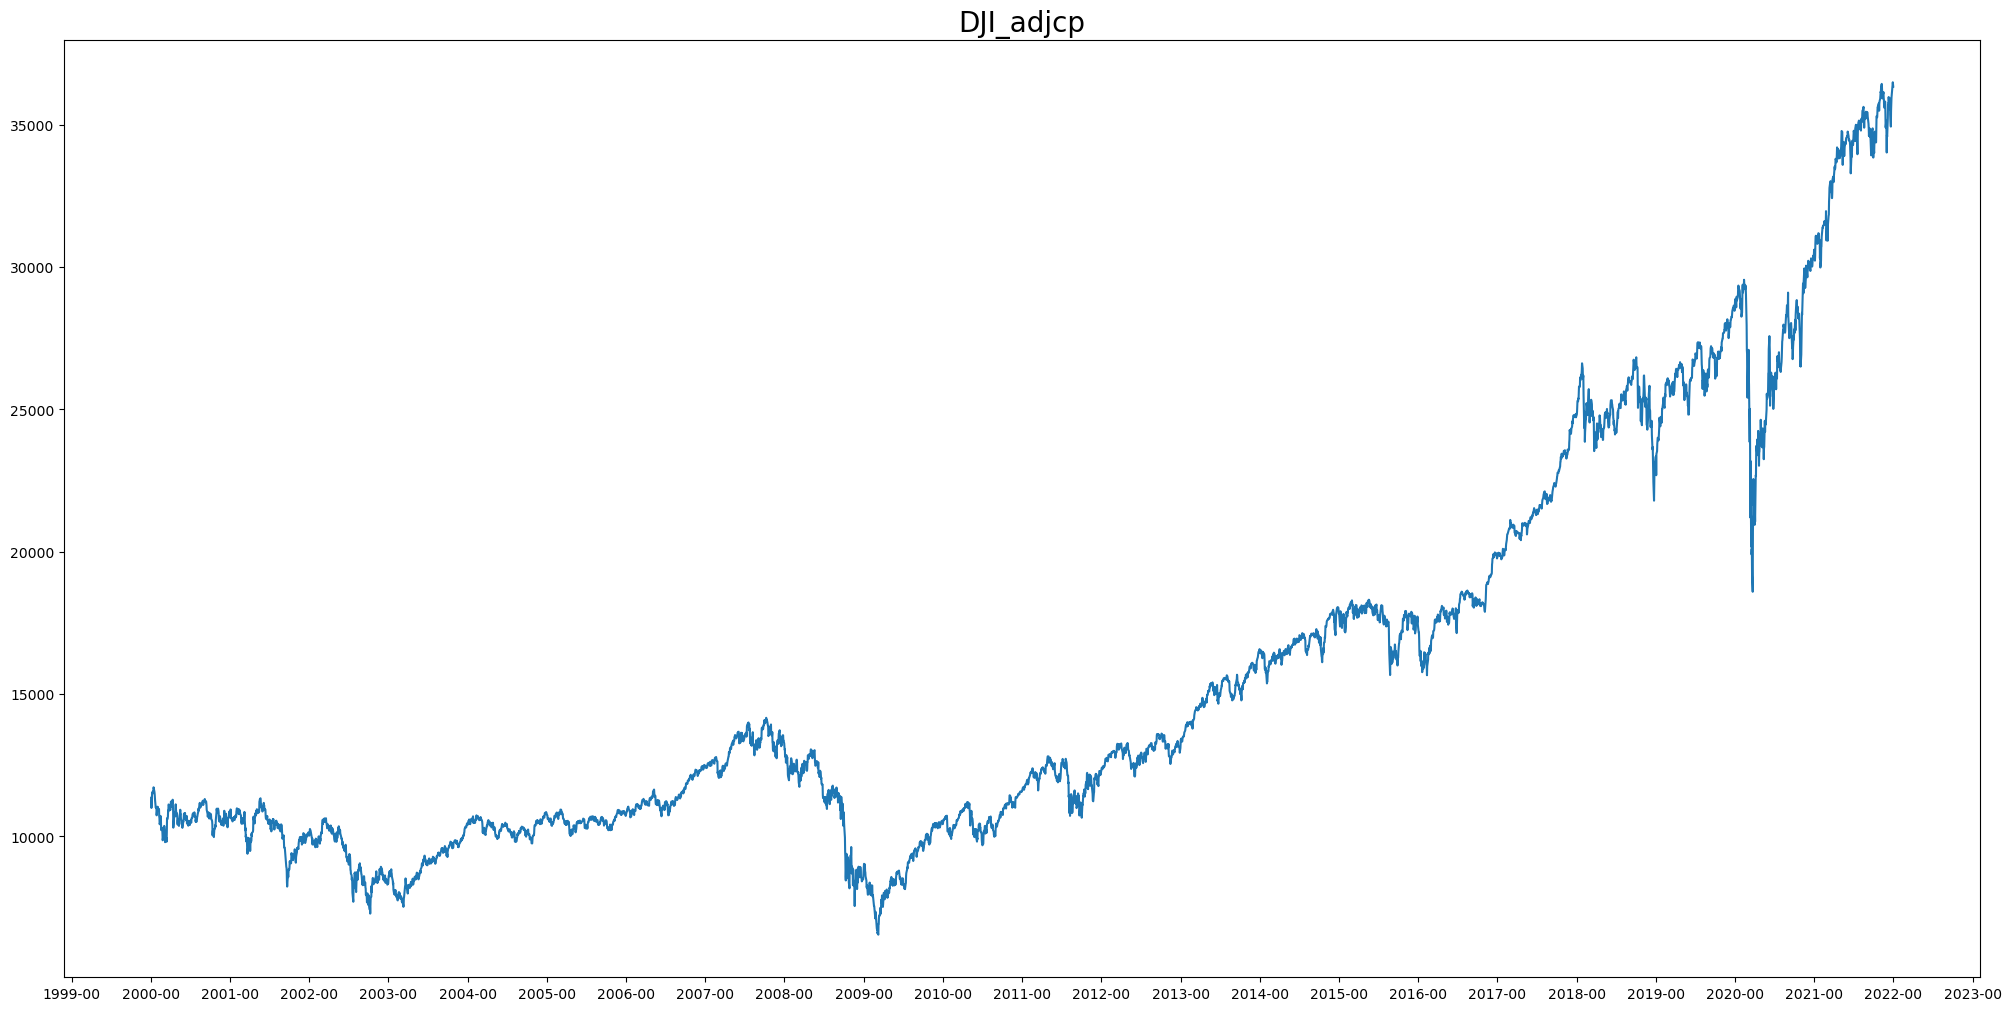

In [26]:
plot_ori(DJI,'DJI')